Example 1 We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.

![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image001.png)

In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are
$$Maximize : A=xy$$
$$Constraint : 500 = x + 2y$$


Okay, we know how to find the largest or smallest value of a function provided it’s only got a single variable. The area function (as well as the constraint) has two variables in it and so what we know about finding absolute extrema won’t work. However, if we solve the constraint for one of the two variables we can substitute this into the area and we will then have a function of a single variable.

So, let’s solve the constraint for x. Note that we could have just as easily solved for y but that would have led to fractions and so, in this case, solving for x will probably be best.
$$x = 500 − 2y$$
Substituting this into the area function gives a function of y.
$$A(y) = ( 500 − 2y ) y = 500y − 2y^2 $$
Note that the endpoints of the interval won’t make any sense from a physical standpoint if we actually want to enclose some area because they would both give zero area. They do, however, give us a set of limits on y and so the Extreme Value Theorem tells us that we will have a maximum value of the area somewhere between the two endpoints. Having these limits will also mean that we can use the process we discussed in the Finding Absolute Extrema section earlier in the chapter to find the maximum value of the area.

So, let’s get the derivative and find the critical points.
$$A′(y) = 500 − 4y$$

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy
from sympy import*
from sympy import*

def my_function(y):
    return 500*y-2*y**2
y = Symbol('y')     
solve(diff(my_function(y), y))   


[125]

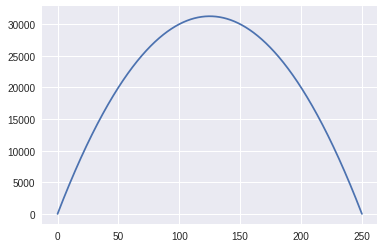

In [88]:
# 1.2 Create input data using NumPy.
x = np.arange(0.0,250.0,0.01)
y = my_function(x)
plt.plot(x,y)

In [0]:
y = tf.Variable(tf.random_uniform([1], 0, 250))

loss = my_function(y)  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.1)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

In [95]:
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(x)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([y]))

[array([82.10146], dtype=float32)]


In [94]:
for step in range(201):
    sess.run(train)   
print(sess.run([y]))

[array([124.99999], dtype=float32)]


In [100]:
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation

# Analysis plugin base class.
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore

# Define population.
indv_template = BinaryIndividual(ranges=[(0, 250)], eps=0.001)
population = Population(indv_template=indv_template, size=30).init()

# Create genetic operators.
selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

# Create genetic algorithm engine.
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    x, = indv.solution
    return my_function(x)

# Define on-the-fly analysis.
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    interval = 1
    master_only = True

    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g, engine.ori_fmax)
        self.logger.info(msg)

    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        y = engine.ori_fmax
        msg = 'Optimal solution: ({}, {})'.format(x, y)
        self.logger.info(msg)

if '__main__' == __name__:
    # Run the GA engine.
    engine.run(ng=500)


gaft.ConsoleOutputAnalysis   INFO     Generation: 0, best fitness: 31193.404
gaft.ConsoleOutputAnalysis   INFO     Generation: 1, best fitness: 31248.115
gaft.ConsoleOutputAnalysis   INFO     Generation: 2, best fitness: 31249.995
gaft.ConsoleOutputAnalysis   INFO     Generation: 3, best fitness: 31249.995
gaft.ConsoleOutputAnalysis   INFO     Generation: 4, best fitness: 31249.995
gaft.ConsoleOutputAnalysis   INFO     Generation: 5, best fitness: 31249.995
gaft.ConsoleOutputAnalysis   INFO     Generation: 6, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 7, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 8, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 9, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 10, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 11, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 12, best fitness: 31249.

In [60]:
y = 125
x = 500 - 2*y
A = x * y
print('x:',x)
print('y:',y)
print('A:',A)

x: 250
y: 125
A: 31250
